In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [9]:
dataset =pd.read_csv("music_playlist-pop.csv")


dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          100 non-null    object 
 1   artist            100 non-null    object 
 2   music             100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   loudness          100 non-null    float64
 6   speechiness       100 non-null    float64
 7   acousticness      100 non-null    float64
 8   instrumentalness  100 non-null    float64
 9   liveness          100 non-null    float64
 10  duration_ms       100 non-null    int64  
dtypes: float64(7), int64(1), object(3)
memory usage: 8.7+ KB


In [10]:
dataset.head()

,track_id,artist,music,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,duration_ms
0,4LRPiXqCikLlN15c3yImP7,Harry Styles,As It Was,0.520,0.731,-5.338,0.0557,0.3420,0.001010,0.3110,167303
1,27NovPIUIRrOZoCHxABJwK,Lil Nas X,INDUSTRY BABY (feat. Jack Harlow),0.736,0.704,-7.409,0.0615,0.0203,0.000000,0.0501,212000
2,6CDzDgIUqeDY5g8ujExx2f,Glass Animals,Heat Waves,0.761,0.525,-6.900,0.0944,0.4400,0.000007,0.0921,238805
3,0HqZX76SFLDz2aW8aiqi7G,Imagine Dragons,Bones,0.773,0.742,-3.678,0.0460,0.0206,0.000000,0.0754,165265
4,10hcDov7xmcRviA8jLwEaI,Doja Cat,Need to Know,0.664,0.609,-6.509,0.0707,0.3040,0.000000,0.0926,210560


In [11]:
dataset.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,duration_ms
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.669610,0.683800,-5.727370,0.082334,0.172339,0.004064,0.170571,195066.640000
std,0.135595,0.138229,1.832264,0.073730,0.209290,0.018348,0.130129,31121.757962
min,0.334000,0.133000,-10.965000,0.025900,0.001470,0.000000,0.026400,136012.000000
25%,0.588750,0.610750,-6.910250,0.038575,0.020600,0.000000,0.091375,169150.250000
50%,0.675500,0.696500,-5.496500,0.052500,0.089900,0.000000,0.104000,197253.000000
75%,0.770250,0.794500,-4.238250,0.093425,0.248000,0.000109,0.212250,215057.250000
max,0.965000,0.913000,-2.613000,0.411000,0.837000,0.130000,0.584000,269333.000000


In [12]:
dataset.corr()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,duration_ms
danceability,1.000000,0.229019,0.142616,0.111513,-0.172918,0.006061,-0.178013,-0.046556
energy,0.229019,1.000000,0.614010,-0.106737,-0.554490,-0.223143,0.129780,-0.080565
loudness,0.142616,0.614010,1.000000,-0.223584,-0.305740,-0.265166,0.021643,-0.134450
speechiness,0.111513,-0.106737,-0.223584,1.000000,0.202019,0.350223,0.080012,-0.182524
acousticness,-0.172918,-0.554490,-0.305740,0.202019,1.000000,0.091626,0.027431,0.000364
instrumentalness,0.006061,-0.223143,-0.265166,0.350223,0.091626,1.000000,-0.147709,-0.088526
liveness,-0.178013,0.129780,0.021643,0.080012,0.027431,-0.147709,1.000000,-0.085880
duration_ms,-0.046556,-0.080565,-0.134450,-0.182524,0.000364,-0.088526,-0.085880,1.000000


<AxesSubplot:>

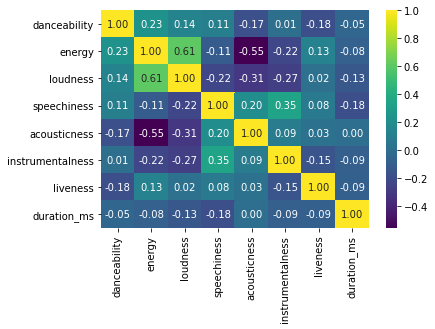

In [17]:
sb.heatmap(dataset.corr(), annot=True, cmap="viridis", fmt="0.2f")